## Gradient Descent

Gradient Descent is a first-order iterative optimization algorithm (i.e. first order derivative is the slope) in order to fine the minimum of a function. To train a machine learning algorithm such as Logistic Regression, the optimal weights are determined by using Gradient Descent that minimizes the cost function $J(\theta)$.

<img src='../sources/Gradient_Desc.png'>

In supervised learning, we attempt to approximate y as a linear function of x in the euqation below. How are we going to represent the parameters in the hypothesis, $h$? Recall $\theta$ are the parameters, also called the weights, for the linear mapping function from X to y. 

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$$

The parameters $\theta$ are computed from the following equation:

$$h(x) = \sum{\theta_{i}x_{i}} = \theta^{T}x$$

The objective is to make h(x) as close to the true *y* value as possible. To do this, we will need to measure, for each value of $\theta$ in the model as to how close it is to $h(x^{i})$. This is known as the quadratic cost function. In linear regression, the cost function is as follows (i.e. least squares):

$$J(\theta) = \frac{1}{2m}\sum({h_{\theta}(x^{(i)}) - y^{(i)})}^{2}$$

In the expression above, we want to select a $\theta$ value that minimizes the cost function, $J(\theta)$. One optimization technique is **gradient descent**, which is an algorithm that iteratively takes a step in the steepest decrease of J in order to minimize the cost function. The first step is guess an initial value the $\theta$ and repeatedly update $\theta$ until $\theta$ converges to a value that minimizes $J(\theta)$. Note: the update is done simultaneously for all values of j = 0,...,n). 

$$\theta_{j} := \theta_{j} - \alpha * \frac{\partial}{\partial{\theta_{j}}}J{\theta}$$

Taking care of the partial derivatives for the right hand side, the following update rule for a single traning example is given below (i.e. also known as the Widrow-Hoff learning rule). For every J, update $\theta_{j}$ by:

$$ \frac{\partial}{\partial\theta_{j}}J(\theta) = \frac{\partial}{\partial\theta_{j}} \frac{1}{2}(h_{\theta}(x) - y)^{2}$$

$$Yields:$$

$$ \frac{\partial}{\partial\theta_{j}}J(\theta) = (h_{\theta}(x) - y)x_{j}$$


- For a single training example, the update rule then becomes:

$$\theta_{j} := \theta_{j} + \alpha(y^{(i)} - h_\theta(x^{(i)}))x_{j}^{(i)}$$

- For multiple training examples:

$$\theta_{j} := \theta_{j} + \alpha\frac{1}{m}\sum{(y^{(i)} - h_\theta(x^{(i)}))x_{j}^{(i)}}$$

Keep in mind that during batch gradient descent, the algorithm has to scan every single instance of the training set before taking a single step, which can take longer to compute, espcially for larger datasets. 

Alternatively, a close form solution for soliving $\theta$ is as follows:

$$\theta = (X^{T}X)^{-1}X^{T}y$$ 

If the dataset is significanlly large, we can look at implementing stochastic gradient descent. In contrast to gradient descent as mentioned above, SGD we repeatedly run through the training set data and update the parameters according to the gradient of the error with respect to the corresponding training example. Often the case, SGD performs much faster than batch gradient descent as $\theta$ moves closer to the minimum quicker. Note in the update equation below, the weights are updated incrementally with a single training sample, not the entire dataset. 

**Steps:**
- Randomly Shuffle Data
- For i = 1 to m:
$\theta_{j} := \theta_{j} + \alpha(y^{(i)} - h_\theta(x^{(i)}))x_{j}^{(i)}$

### Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Total Iterations:  12
Converged Value: 1.335


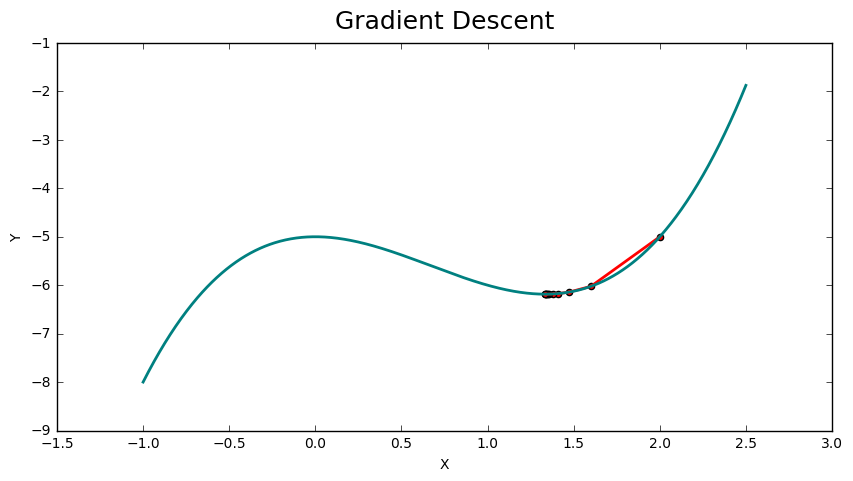

In [106]:
def f(x):
    return(x**3 - 2*x**2 -5)

def f_prime(x):
    return(3*x**2 - 4*x)
        
def gradient_descent(guess,alpha,threshold):
    
    x_old = 0 
    x_new = guess
    
    x_list,y_list = [x_new],[f(x_new)]
    
    while abs(x_new-x_old) > threshold:
        x_old  = x_new
        f1 = -f_prime(x_old)
        x_new = x_old + f1*alpha
        x_list.append(x_new)
        y_list.append(f(x_new))
        
    print('Total Iterations: ',len(x_list))
    print('Converged Value: {0:.3f}'.format(x_new))
    
    return(x_list,y_list)


def get_visual(x_list,y_list):
    
    x = np.linspace(-1,2.5,1000)
    
    #Setup Grid Plot
    fig = plt.figure(figsize=(10,5))    
    ax1 = fig.add_subplot(111)
    ax1.scatter(x_list,y_list,c="r")
    ax1.plot(x_list,y_list,c="r",lw=2.0)
    ax1.plot(x, f(x), c="teal",lw=2.0)
    ax1.set_ylabel('Y')
    ax1.set_xlabel('X')
    ax1.set_title("Gradient Descent",fontsize=18,y=1.02)

if __name__ == '__main__':

    x,y = gradient_descent(2,0.10,0.001)
    get_visual(x,y)

### Gradient Descent Example

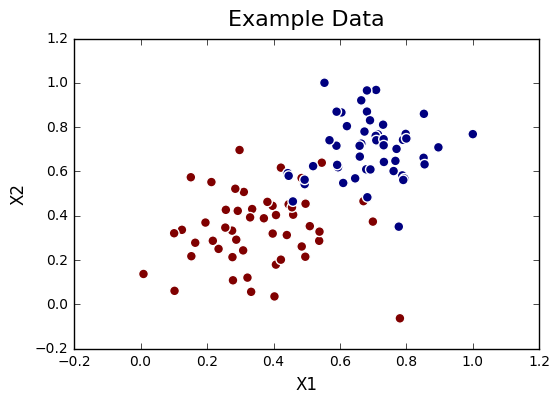

In [2]:
def load_data(filename):
    
    data = pd.read_csv('data/{}.csv'.format(filename), header=None)
    X = np.array(data[[0,1]])
    y = np.array(data[2])
    return X,y
    
def plot_points(X, y):
    plt.scatter(X[:,0],X[:,1],c=y,cmap='jet',edgecolor='w',s=50)
    plt.xlabel('X1',fontsize=12)
    plt.ylabel('X2',fontsize=12)
    plt.title('Example Data',fontsize=16,y=1.02)

if __name__ == '__main__':
    
    filename = 'gradient_ex'
    X,y = load_data(filename)
    plot_points(X,y)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    
    # Made Prediction
    output = output_formula(x, weights, bias)
    
    #Partial Derivative of Loss Function
    d_error = -(y - output)
   
    # Update Weights and Bias Term
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    
    return weights, bias

In [22]:
def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()
    
    return errors

In [35]:
def loss_plot(error):
    
    # Plotting the error
    plt.figure(figsize=(8,5))
    plt.title("Loss Function")
    plt.xlabel('Number of Epochs')
    plt.ylabel('Error')
    plt.plot(error,color='teal',linewidth=2.5)
    plt.show()
    
def display(m,b,color='gray'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color=color,alpha=0.50)


========== Epoch 0 ==========
Train loss:  0.713584519538
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.622583521045
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.554874408367
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.459333464186
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.425255434335
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.397346157167
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.374146976524
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.354599733682
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.337927365888
Accuracy:  0.94


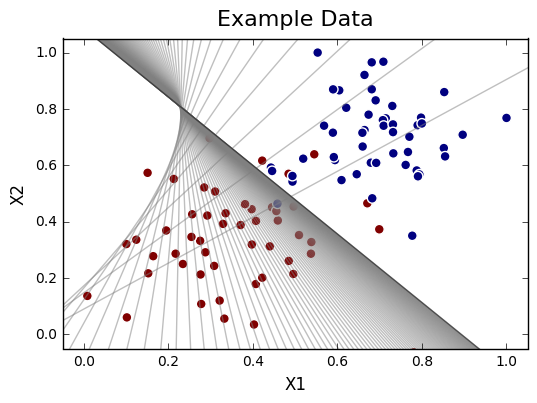

In [33]:
if __name__ == '__main__':
    
    np.random.seed(44)
    epochs = 100
    learnrate = 0.01
    error = train(X, y, epochs, learnrate, True)

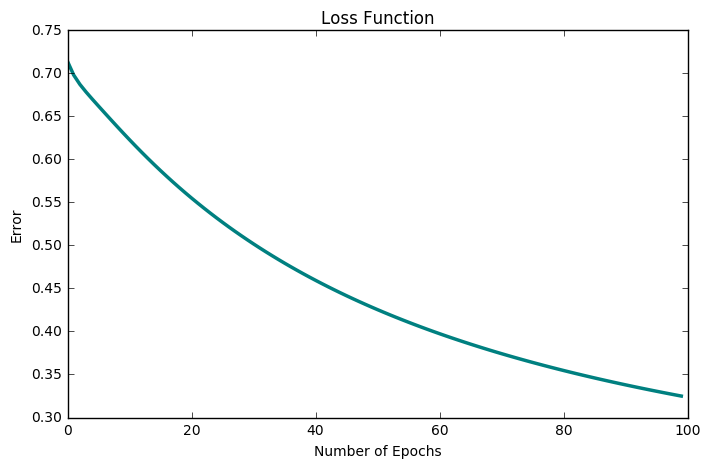

In [36]:
loss_plot(error)